<a href="https://colab.research.google.com/github/andreamat/Cursos_Data_Science/blob/master/PROJETO_3_%7C_Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DSNP - DATA SCIENCE NA PRÁTICA com Carlos Melo**

*by [Andréa Rocha](http://lattes.cnpq.br/8217984846199750
)*

---


<FONT FACE=Times SIZE=10 COLOR="#007364"> ***Projeto 3 | Panorama do COVID-19 no Brasil***</FONT>

#    ***Projeto 3 | Panorama do COVID-19 no Brasil***

$\hspace{0.30cm}$

Em 2019 

Um surto de doença de coronavírus 2019 (COVID-19), causado por um novo coronavírus (chamado SARS-CoV-2) e com uma taxa de mortalidade de casos de aproximadamente 2%, começou em Wuhan (China) em dezembro de 20191,2. Após uma disseminação global sem precedentes3, a Organização Mundial da Saúde declarou COVID-19 uma pandemia em 11 de março de 2020. 

<center><img alt="Colaboratory logo" width="100%" src="https://raw.githubusercontent.com/andreamat/Cursos_Data_Science/master/Imagem/covid_19.jpg"></center>



Mais texto ...

## 1. Obtenção dos Dados

Texto sobre obtenção dos dados ...

### **1.1. Importação das Bibliotecas e dos Dados**

In [ ]:
# Importando bibliotecas necessárias para esse projeto:
import pandas as pd
import numpy as np

# Importando bibliotecas de visualização de dados:
import seaborn as sns
import matplotlib.pyplot as plt

# Visor de gráficos em notebooks:
%matplotlib inline

In [ ]:
# Importando o dataset 'dados_covid.csv' para o dataframe 'data': 
data = pd.read_csv('https://raw.githubusercontent.com/andreamat/Cursos_Data_Science/master/data/dados_covid.csv')

## 2. Análise Exploratória dos Dados

Textto .....

###**2.1. Visualização do DataFrame**

In [ ]:
# Visualizando as 5 primeiras entradas do dataframe:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [ ]:
# Visualizando as 5 últimas entradas do dataframe:
data.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
28919,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28920,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28921,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28922,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28923,NaN,NaN,International,2020-03-10,696.0,-9.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###**2.2. Tamanho do DataFrame**

In [ ]:
# Mostrando o tamanho do DataFrame:
print('Tamanho do DataFrame:', 
      '\nQuantidade de linhas (entradas) = ', data.shape[0], "\n"
      'Quantidade de colunas (variáveis) = ', data.shape[1])

Tamanho do DataFrame: 
Quantidade de linhas (entradas) =  28924 
Quantidade de colunas (variáveis) =  34


###**2.3. Dicionário das variáveis**

In [ ]:
# Extraindo os nomes das variáveis (colunas do DataFrame):
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

Agora, vamos descobrir o que significa cada sigla dessas colunas montando um dicionário das variáveis que ajudará na compreensão dos dados.

**Dicionário das Variáveis**

* `iso_code` - ISO 3166-1 alfa-3 - códigos de países com três letras
* `continent` - Continente da localização geográfica
* `location` - Localização geográfica
* `date` - Data da observação
* `total_cases` - Total de casos confirmados de COVID-19
* `new_cases` - Novos casos confirmados de COVID-19
* `total_deaths` - Total de mortes atribuídas ao COVID-19
* `new_deaths` - Novas mortes atribuídas ao COVID-19
* `total_cases_per_million` - Total de casos confirmados de COVID-19 por 1.000.000 de pessoas
* `new_cases_per_million` - Novos casos confirmados de COVID-19 por 1.000.000 de pessoas
* `total_deaths_per_million` - Total de mortes atribuídas ao COVID-19 por 1.000.000 de pessoas
* `new_deaths_per_million` - Novas mortes atribuídas ao COVID-19 por 1.000.000 de pessoas
* `total_tests` - Total de testes para COVID-19
* `new_tests` - Novos testes para COVID-19
* `new_tests_smoothed` - Novos testes para COVID-19 (suavizado por 7 dias). Para países que não relatam dados de teste diariamente, assumimos que o teste mudou igualmente diariamente em qualquer período em que nenhum dado foi relatado. Isso produz uma série completa de números diários, que são calculados como média em uma janela de 7 dias consecutivos
* `total_tests_per_thousand` - Total de testes para COVID-19 por 1.000 pessoas
* `new_tests_per_thousand` - Novos testes para COVID-19 por 1.000 pessoas
* `new_tests_smoothed_per_thousand` - Novos testes para COVID-19 (7 dias suavizados) por 1.000 pessoas
* `tests_units` - Unidades usadas pelo local para relatar seus dados de teste
* `stringency_index` - Índice de Estresse da Resposta do Governo: medida composta baseada em 9 indicadores de resposta, incluindo fechamento de escolas, fechamento de locais de trabalho e proibições de viagens, redimensionada para um valor de 0 a 100 (100 = resposta mais estrita)
* `population` - População em 2020
* `population_density` - Número de pessoas divididas por área terrestre, medida em quilômetros quadrados, no ano mais recente disponível
* `median_age` - Idade média da população, projeção da ONU para 2020
* `aged_65_older` - Proporção da população com 65 anos ou mais, ano mais recente disponível
* `aged_70_older` - Percentagem da população com 70 anos ou mais em 2015
* `gdp_per_capita` - Produto interno bruto com paridade do poder de compra (dólares internacionais constantes de 2011), último ano disponível
* `extreme_poverty` - Percentagem da população que vive em extrema pobreza, último ano disponível desde 2010
* `cvd_death_rate` - Taxa de mortalidade por doenças cardiovasculares em 2017
* `diabetes_prevalence` - Prevalência de diabetes (% da população entre 20 e 79 anos) em 2017
* `female_smokers` - Percentagem de mulheres que fumam, último ano disponível
* `male_smokers` - Proporção de homens que fumam, último ano disponível
* `handwashing_facilities` - Percentagem da população com instalações básicas de lavagem das mãos nas instalações, último ano disponível
* `hospital_beds_per_thousand` - Camas de hospital por 1.000 pessoas, último ano disponível desde 2010
* `life_expectancy` - Expectativa de vida no nascimento em 2019


###**2.4. Tipos das variáveis**

In [ ]:
# Verificando os tipos das variáveis:
data.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

Para explorarmos ao máximo a nossa variável `date`, vamos transformá-la no formato `datetime`. Dessa forma, podemos acessar as informações usando apenas o ano, o mês ou o dia. 

**Conversão da coluna `date` para o formato `datetime`:**

In [ ]:
# Convertendo a coluna date:
data.date = pd.to_datetime(data.date)
data.date

0       2019-12-31
1       2020-01-01
2       2020-01-02
3       2020-01-03
4       2020-01-04
           ...    
28919   2020-02-28
28920   2020-02-29
28921   2020-03-01
28922   2020-03-02
28923   2020-03-10
Name: date, Length: 28924, dtype: datetime64[ns]

Como podemos observar acima, a variável `date` foi convertida para o formato `datetime`.

###**2.5. Porcentagem de valores ausentes nas colunas**

Outro aspecto, a ser analisado com cuidado, é a quantidade de valores ausentes e o motivo pelo qual eles estão ausentes.

In [ ]:
# Calculando a porcentagem de valores ausentes nas colunas:
(data.isnull().sum() / data.shape[0]).sort_values(ascending=False)

new_tests                          0.712868
new_tests_per_thousand             0.712868
total_tests_per_thousand           0.699039
total_tests                        0.699039
new_tests_smoothed_per_thousand    0.674492
new_tests_smoothed                 0.674492
tests_units                        0.650740
handwashing_facilities             0.590928
extreme_poverty                    0.403679
male_smokers                       0.287408
female_smokers                     0.278972
stringency_index                   0.194199
hospital_beds_per_thousand         0.176220
aged_65_older                      0.111015
gdp_per_capita                     0.108595
aged_70_older                      0.102787
median_age                         0.098154
cvd_death_rate                     0.097117
diabetes_prevalence                0.067591
population_density                 0.044081
life_expectancy                    0.013933
new_deaths_per_million             0.011686
total_deaths_per_million        

###**2.6. Países com  mais casos e mortes**

Como a nossa variável `date` já está no formato `datetime`, podemos buscar as datas de nosso interesse. Nessa etapa, buscaremos as datas mais recentes para verificar os países que estão com mais casos e mortes no momento.


In [ ]:
# Buscando a data mais recentes: 
data.date.max()

Timestamp('2020-07-08 00:00:00')

**Total de casos confirmados de COVID-19:**

In [ ]:
# Total de casos confirmados:
data.loc[data.date == '2020-07-08'].sort_values(by="total_cases", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
28859,OWID_WRL,NaN,World,2020-07-08,11801805.0,206641.0,543902.0,6087.0,1514.062,26.510,69.778,0.781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58
27523,USA,North America,United States,2020-07-08,2996098.0,57473.0,131480.0,1174.0,9051.583,173.633,397.217,3.547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86
3908,BRA,South America,Brazil,2020-07-08,1668589.0,45305.0,66741.0,1254.0,7849.989,213.140,313.988,5.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
12267,IND,Asia,India,2020-07-08,742417.0,22752.0,20642.0,482.0,537.982,16.487,14.958,0.349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.55,0.530,69.66
21837,RUS,Europe,Russia,2020-07-08,694230.0,6368.0,10494.0,198.0,4757.135,43.636,71.909,1.357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050,72.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17889,MSR,North America,Montserrat,2020-07-08,11.0,0.0,1.0,0.0,2200.440,0.000,200.040,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.999000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.16
20473,PNG,Oceania,Papua New Guinea,2020-07-08,11.0,0.0,0.0,0.0,1.229,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.947027e+06,18.220,22.6,3.808,2.142,3823.194,NaN,561.494,17.65,23.500,48.800,NaN,NaN,64.50
4012,VGB,North America,British Virgin Islands,2020-07-08,8.0,0.0,1.0,0.0,264.577,0.000,33.072,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.023700e+04,207.973,NaN,NaN,NaN,NaN,NaN,NaN,13.67,NaN,NaN,NaN,NaN,79.07
3500,BES,North America,Bonaire Sint Eustatius and Saba,2020-07-08,7.0,0.0,0.0,0.0,266.962,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.622100e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.79


Países com mais casos confirmados de COVID-19 na data de 08-07-2020:

* Estados Unidos - 2.996.098 casos
* Brasil - 1.668.589 casos
* India - 742.417 casos

**Total de mortes atribuídas ao COVID-19:**

In [ ]:
# Total de mortes atribuídas:
data.loc[data.date == '2020-07-08'].sort_values(by="total_deaths", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
28859,OWID_WRL,NaN,World,2020-07-08,11801805.0,206641.0,543902.0,6087.0,1514.062,26.510,69.778,0.781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58
27523,USA,North America,United States,2020-07-08,2996098.0,57473.0,131480.0,1174.0,9051.583,173.633,397.217,3.547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86
3908,BRA,South America,Brazil,2020-07-08,1668589.0,45305.0,66741.0,1254.0,7849.989,213.140,313.988,5.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
27332,GBR,Europe,United Kingdom,2020-07-08,286349.0,581.0,44391.0,155.0,4218.086,8.558,653.905,2.283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.000,24.700,NaN,2.540,81.32
13512,ITA,Europe,Italy,2020-07-08,241956.0,137.0,34899.0,30.0,4001.798,2.266,577.207,0.496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.046183e+07,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.800,27.800,NaN,3.180,83.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26133,TLS,Asia,Timor,2020-07-08,24.0,0.0,0.0,0.0,18.203,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.318442e+06,87.176,18.0,3.556,1.897,6570.102,30.3,335.346,6.86,6.300,78.100,28.178,5.900,69.50
17667,MNG,Asia,Mongolia,2020-07-08,220.0,0.0,0.0,0.0,67.108,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.278292e+06,1.980,28.6,4.031,2.421,11840.846,0.5,460.043,4.82,5.500,46.500,71.180,7.000,69.87
10850,GRD,North America,Grenada,2020-07-08,23.0,0.0,0.0,0.0,204.410,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.125190e+05,317.132,29.4,7.304,5.021,13593.877,NaN,243.964,10.71,NaN,NaN,NaN,3.700,72.40
22281,VCT,North America,Saint Vincent and the Grenadines,2020-07-08,29.0,0.0,0.0,0.0,261.386,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.109470e+05,281.787,31.8,7.724,4.832,10727.146,NaN,252.675,11.62,NaN,NaN,NaN,2.600,72.53


Países com o maior número de mortes atribuídas ao COVID-19 na data de 08-07-2020:

* Estados Unidos - 131.480 mortes
* Brasil - 66.741 mortes
* Reino Unido - 44.391 mortes

**Visualizando os 5 países com mais casos confirmados de COVID-19:**

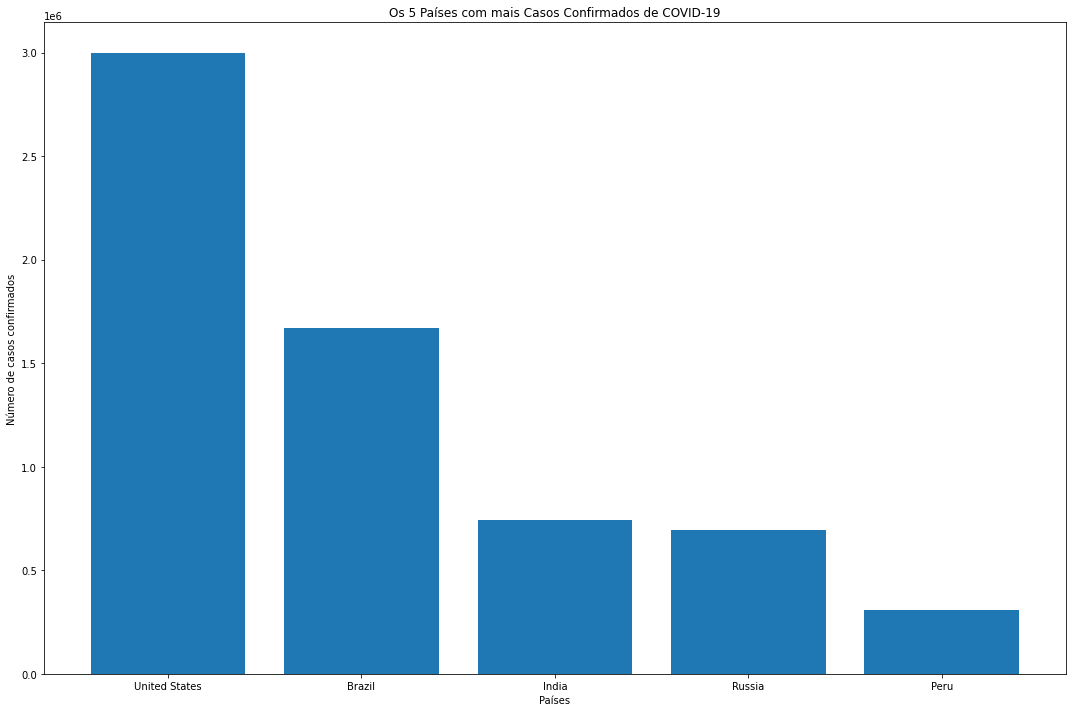

In [ ]:
# Gráfico de barras para o total de casos confirmados:
top_5_total_cases = data.loc[data.date == '2020-07-08', ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[1:6]

fig, ax = plt.subplots(figsize=(15,10))

ax.bar('location', 'total_cases', data=top_5_total_cases,)
ax.set_title('Os 5 Países com mais Casos Confirmados de COVID-19')
ax.set_xlabel('Países')
ax.set_ylabel('Número de casos confirmados')

plt.tight_layout()

**Visualizando os 5 países com o maior número de mortes atribuídas ao COVID-19:**

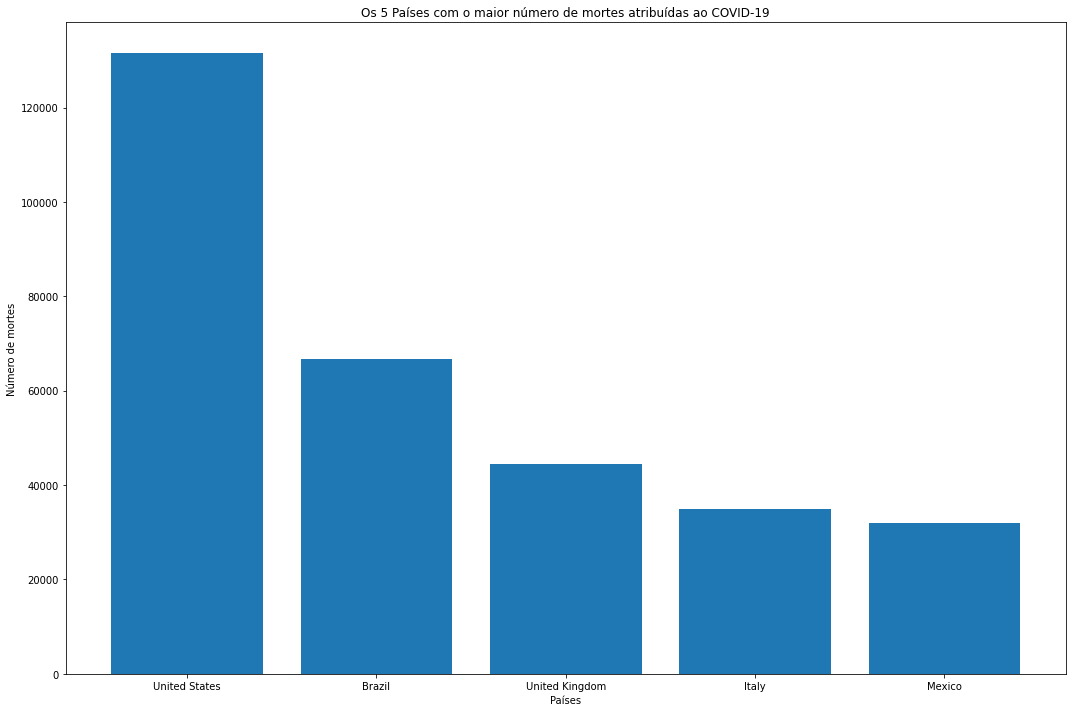

In [ ]:
# Gráfico de barras para o total de mortes:
top_5_total_deaths = data.loc[data.date == '2020-07-08', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]

fig, ax = plt.subplots(figsize=(15,10))

ax.bar('location', 'total_deaths', data=top_5_total_deaths,)
ax.set_title('Os 5 Países com o maior número de mortes atribuídas ao COVID-19')
ax.set_xlabel('Países')
ax.set_ylabel('Número de mortes')

plt.tight_layout()

**Evolução da doença no mundo**

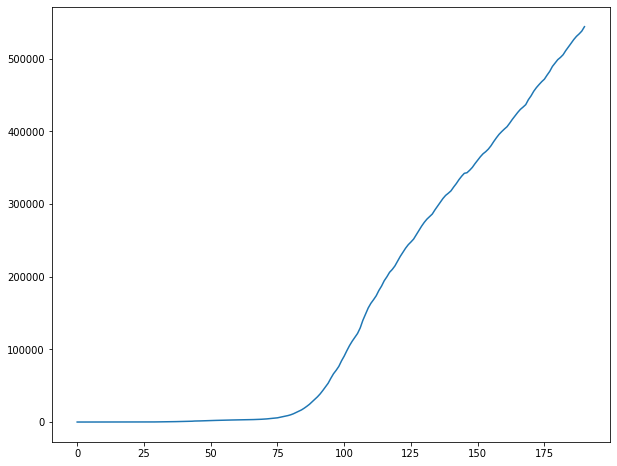

In [ ]:
# Gráfico de linhas para evolução de mortes no mundo:
data.loc[data.location == "World", "total_deaths"].reset_index(drop=True).plot(figsize=(10,8));

## 3. Análise Exploratória para o Brasil

Texto....

In [ ]:
# Criando uma cópia do DataFrame somente com o Brasil:
df_brasil = data.loc[data.location == 'Brazil'].copy()
df_brasil

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3718,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3719,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3720,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3721,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3722,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,BRA,South America,Brazil,2020-07-04,1539081.0,42223.0,63174.0,1290.0,7240.710,198.641,297.206,6.069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3905,BRA,South America,Brazil,2020-07-05,1577004.0,37923.0,64265.0,1091.0,7419.121,178.411,302.339,5.133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3906,BRA,South America,Brazil,2020-07-06,1603055.0,26051.0,64867.0,602.0,7541.680,122.559,305.171,2.832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3907,BRA,South America,Brazil,2020-07-07,1623284.0,20229.0,65487.0,620.0,7636.848,95.169,308.088,2.917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [ ]:
# Buscando a data mais recente
df_brasil.date.max()

Timestamp('2020-07-08 00:00:00')

## 4. Conclusão
